<a href="https://colab.research.google.com/github/Mohit501/MNIST-Digits-Classification/blob/main/Y_Network_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading Required Libraries**

In [ ]:
import numpy as np
from tensorflow import keras 
from keras.models import Model
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,Input
from keras.utils import to_categorical,plot_model
from keras.layers.merge import concatenate
from keras.datasets import mnist

# **Loading Data**

In [ ]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [ ]:
num_labels = len(np.unique(y_train))

# **PreProcessing**

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

**Reshaping and Normalizing input images**

In [ ]:
image_size = X_train.shape[1]
x_train = np.reshape(X_train,[-1,image_size,image_size,1])
x_train = x_train.astype('float32')/255.0
x_test = np.reshape(X_test,[-1,image_size,image_size,1])
x_test = x_test.astype('float32')/255.0

## **Y-Network CNN**

In [ ]:
n_filters = 32
input_shape = (image_size,image_size,1)

In [ ]:
#left branch of Y network
left_inputs = Input(shape = input_shape)
x = left_inputs
for i in range(3):
  x = Conv2D(filters=n_filters,kernel_size = 3,padding='same',activation = 'relu')(x)
  x = Dropout(0.4)(x)
  x = MaxPooling2D()(x)
  n_filters*=2

#right branch of Y network
right_inputs = Input(shape = input_shape)
y = right_inputs
for i in range(3):
  y = Conv2D(filters=n_filters,kernel_size = 3,padding='same',activation = 'relu',dilation_rate=2)(y)
  y = Dropout(0.4)(y)
  y = MaxPooling2D()(y)
  n_filters*=2

#Merging both Layers
y = concatenate([x,y])
y = Flatten()(y)
y = Dropout(0.4)(y)
outputs = Dense(num_labels,activation='softmax')(y)

model = Model([left_inputs,right_inputs],outputs)


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 28, 28, 256)  2560        input_2[0][0]                    
______________________________________________________________________________________________

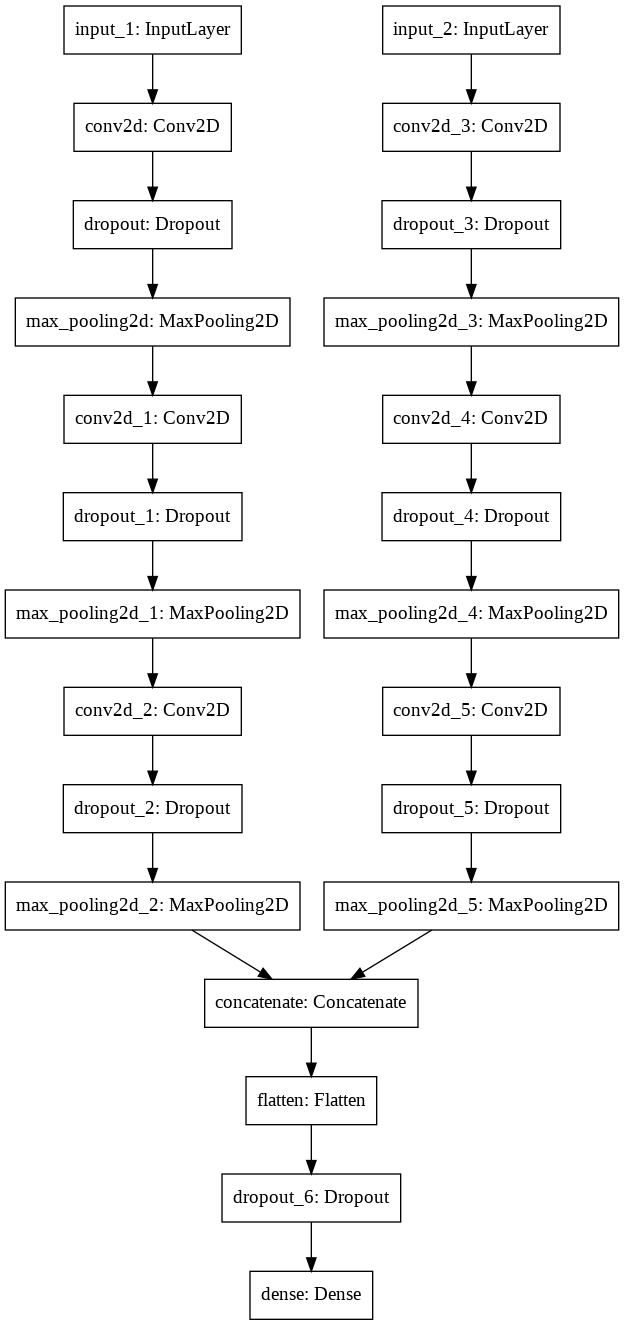

In [ ]:
plot_model(model)

In [ ]:
model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit([x_train, x_train],y_train,batch_size = 128 ,epochs = 10)

Epoch 1/10
469/469 [==============================] - 54s 105ms/step - loss: 0.6839 - accuracy: 0.8352
Epoch 2/10
469/469 [==============================] - 50s 107ms/step - loss: 0.0455 - accuracy: 0.9861
Epoch 3/10
469/469 [==============================] - 51s 109ms/step - loss: 0.0327 - accuracy: 0.9900
Epoch 4/10
469/469 [==============================] - 51s 108ms/step - loss: 0.0278 - accuracy: 0.9921
Epoch 5/10
469/469 [==============================] - 51s 108ms/step - loss: 0.0256 - accuracy: 0.9924
Epoch 6/10
469/469 [==============================] - 51s 108ms/step - loss: 0.0205 - accuracy: 0.9938
Epoch 7/10
469/469 [==============================] - 51s 108ms/step - loss: 0.0207 - accuracy: 0.9936
Epoch 8/10
469/469 [==============================] - 51s 108ms/step - loss: 0.0187 - accuracy: 0.9941
Epoch 9/10
469/469 [==============================] - 51s 108ms/step - loss: 0.0196 - accuracy: 0.9943
Epoch 10/10
469/469 [==============================] - 51s 108ms/step - l

In [ ]:
loss,acc = model.evaluate([x_test,x_test],y_test,batch_size = 128)

79/79 [==============================] - 3s 31ms/step - loss: 0.0546 - accuracy: 0.9904
